# More Data Loading and Preprocessing

In this tutorial we will explain how you can use existing python packages to load data. Data which we will ask you to use during the next tutorials. We will be using the MNIST and CIFAR-10 dataset. These are two widely known image datasets used for training machine learning models. We already explained something about these datasets in previous tutorials. In this tutorial we will specifically examine how we can use PyTorch to load these datasets and how the data is structured. 

We will start with the Dataset class from PyTorch which we can use to download and load many different existing datasets. Then we will perform several transformations on the data in order to practice how we could preprocess the data. Finally, we will focus on DataLoaders which will make our lives somewhat easier as they help us to create batches of the data which we can then use to train machine learning models without having to load the entire dataset or to perform randomized training. 

Below you can see we load several python packages. The first few are there to help us visualize the data to get a better sense of what we are working on. The last few, the torch packages, will be the main focus of this tutorial. They help us download and load the data.

In [1]:
import matplotlib.pyplot as plt

from PIL import Image

import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

## PyTorch Dataset (MNIST Dataset)

### PyTorch, Torchvision & Built-in Datasets

To load MNIST (or later CIFAR-10) we will make use of PyTorch and more specifically PyTorch's package named [torchvision](https://pytorch.org/vision/stable/index.html). This is a package containing popular datasets, model architectures and common image transformations (to be used during preprocessing for example) for computer vision.

We can load many datasets using the [torchvision.datasets](https://pytorch.org/vision/0.16/datasets.html) module. You can also use this module to create your own dataset. Executing the code cell below will list all function (or variable) names which can be found inside the datasets module. In between this list you can spot the different built-in datasets, such as MNIST and CIFAR-10.

In [2]:
dir(datasets)

['CIFAR10',
 'CIFAR100',
 'CLEVRClassification',
 'CREStereo',
 'Caltech101',
 'Caltech256',
 'CarlaStereo',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'Country211',
 'DTD',
 'DatasetFolder',
 'EMNIST',
 'ETH3DStereo',
 'EuroSAT',
 'FER2013',
 'FGVCAircraft',
 'FakeData',
 'FallingThingsStereo',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'Flowers102',
 'FlyingChairs',
 'FlyingThings3D',
 'Food101',
 'GTSRB',
 'HD1K',
 'HMDB51',
 'INaturalist',
 'ImageFolder',
 'ImageNet',
 'InStereo2k',
 'KMNIST',
 'Kinetics',
 'Kitti',
 'Kitti2012Stereo',
 'Kitti2015Stereo',
 'KittiFlow',
 'LFWPairs',
 'LFWPeople',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Middlebury2014Stereo',
 'MovingMNIST',
 'Omniglot',
 'OxfordIIITPet',
 'PCAM',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'RenderedSST2',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SUN397',
 'SVHN',
 'SceneFlowStereo',
 'Sintel',
 'SintelStereo',
 'StanfordCars',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 'VisionDataset'

All built-in datasets are a subclass of the module [torch.utils.data.Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset). Running the code cell below will show the function (or variable) names of the MNIST dataset module.

In [3]:
dir(datasets.MNIST)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_is_protocol',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'test_data',
 'test_file',
 'test_labels',
 'train_data',
 'train_labels',
 'training_file']

If we take a closer look at the the [datasets.MNIST](https://pytorch.org/vision/0.16/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) documentation we can see how we can load the dataset into our jupyter notebook.

It takes several parameters:
- root (string): Root directory of the dataset where the MNIST data should exist. This is a directory you can specify yourself. Another parameter named 'download' will download the MNIST dataset from the internet and place it in this directory.
- train (bool, optional): If this parameter is set to True, it creates a training dataset. Otherwise, it will create a test dataset. As mentioned this parameter is optional, so you do not need to pass it with a value. Its default value is set to True.
- download (bool, optional): If this parameter is set to True, it downloads the dataset from the internet and puts it in the specified root directory. If the dataset is already downloaded, it is not downloaded again. This parameter is optional, so you do not need to pass it with a value. Its default value is set to False.
- transfrom (callable, optional): A function/transform can be passed that takes in a PIL type image and returns a transformed version. See e.g. [torchvision.transforms](https://pytorch.org/vision/0.9/transforms.html). This parameter is optional, so you do not need to pass it with a value. Its default value is set to None.
- target_transform (callable, optional): a function/transform can be passed that takes in the target and transforms it. This parameter is optional, so you do not need to pass it with a value. Its default value is set to None.

Lets now load the MNIST training set, by executing the code cell below:

In [4]:
train_set = torchvision.datasets.MNIST(root='./data', download=True, train=True)

If everything went correct, a new directory was created in the same directory as this jupyter notebook called 'data'. Inside this directory you will find the MNIST training data (images and labels). The dataset object is now loaded in the variable named 'train_set'. Like mentioned before, this dataset object has several functions which can be called.

In [5]:
dir(train_set)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_is_protocol',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

For example we can ask for the training labels:

In [6]:
print(train_set.targets)

tensor([5, 0, 4,  ..., 5, 6, 8])


Or we can ask for the training data:

In [7]:
print(train_set.data)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

You can get the number of training samples:

In [8]:
len(train_set)

60000

You can also pick a specific training sample, which is a tuple of an [PIL](https://pillow.readthedocs.io/en/stable/) image and its corresponding label. 

In [9]:
train_set[2]

(<PIL.Image.Image image mode=L size=28x28>, 4)

Maybe you already noticed, but this is different from when you would take the image data via `train_set.data` and `train_set.target` where, as you could see in the example above, the image data is stored as tensors. This is the case because the `Dataset` class comes with a [`__getitem__()`](https://pytorch.org/vision/0.16/_modules/torchvision/datasets/mnist.html#MNIST) method that will turn the tensor into a PIL image. This `__getitem__()` method is used when you access a data sample by using the index on the entire dataset object. The method will also perform a transform on the data if a transform function is available, but more on this later.

We then use display, which is a method that can be used on PIL image objects, on the image related to training sample 2, by taking the first element (at index zero) of the tuple.

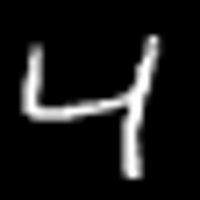

In [13]:
display(train_set[2][0].resize((200,200)))

The label the corresponds to this image is stored as second element (index 1) of this tuple:

In [14]:
print("Label = ",train_set[2][1])

Label =  4


We can also load the MNIST test set by switching the train parameter to False:

In [15]:
test_set = torchvision.datasets.MNIST(root='./data', download=True, train=False)

In [16]:
print(len(test_set))

10000


In [17]:
test_set[2]

(<PIL.Image.Image image mode=L size=28x28>, 1)

As you can see, the test set contains similar data tuples where the first element holds the image and the second element the correct label.

### Transforms

Now you could think we are done as we downloaded the dataset from the internet and loaded it into a dataset object/variable. Yes this is correct. However, to train machine learning models you will often need to make sure the data is in the correct format or preprocessed in a certain way. This can easily be done by making use of the transform parameter which we can pass to the dataset module. Lets now take a closer look into this.

Before we will transform entire datasets, lets zoom in a bit to see what is meant with transformations:

Label =  5




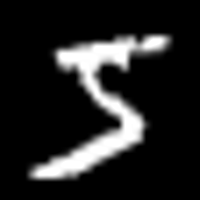


Label is of type:  <class 'int'>

Image is of type:  <class 'PIL.Image.Image'>


In [19]:
train_image, train_label = train_set[0]

print("Label = ", train_label)
print("\n")
display(train_image.resize((200,200)))

print("\nLabel is of type: ", type(train_label))
print("\nImage is of type: ", type(train_image))

#### Tensor

We know that the dataset contains PIL images and Integer labels. However, to be able to train neural networks with PyTorch we will need to transform the PIL images to tensors. In a previous tutorial we explained what tensors are and what you can do with them. If you do not remember or did not follow this tutorial we encourage you to take a look at it before continuing with this tutorial. 

Now lets first transform one PIL image into tensor format to get an idea of what this does to the data.

In [20]:
print(train_image)

<PIL.Image.Image image mode=L size=28x28 at 0x22BDD738F70>


To transform this PIL image into tensor format we can make use of the [PILToTensor](https://pytorch.org/vision/main/generated/torchvision.transforms.PILToTensor.html#torchvision.transforms.PILToTensor) class of the transforms package. 

In [21]:
# First make a PILToTensor() object
p2t = transforms.PILToTensor()

# Then use the object to transform the PIL image to tensor
train_image_tensor = p2t(train_image)

print(train_image_tensor)

tensor([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
           18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,

We can also make use of the Compose class inside the transforms package to chain several transforms together. Applying the PILToTensor transform with the Compose would look like this:

In [22]:
transform = transforms.Compose([
    transforms.PILToTensor()
])

train_image_tensor = transform(train_image)

In [23]:
print(train_image_tensor)

tensor([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
           18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,

Below you will find a method which you can use to plot the image tensors. It takes the image data in tensor format and the Integer label.

In [24]:
def plot_image(image,label,colored=False):
    figure = plt.figure(figsize=(4, 4))
    if not colored:
        plt.imshow(image[0].cpu(), cmap='gray')
    else:
        plt.imshow(image.permute(1, 2, 0))
    plt.title("label = " + str(label))

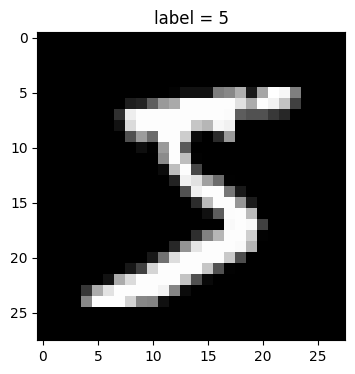

In [25]:
plot_image(train_image_tensor,train_label)

#### Normalize

Another transform we might want to perform is to normalize all data. By normalizing all data we can ensure, in the case of using image data, that all pixel values are in the same range (for example in the range 0 to 1 or -1 to 1) and so we could reduce learning time. The process of training a machine learning model could be affected by the different pixel values as some images might include higher or lower pixel values than similar cases.

To get the data between 0 and 1 is as simply as dividing it by the maximum pixel value.

In [26]:
print("Minimum pixel value: ", train_set.data.min().item())
print("Maximum pixel value: ", train_set.data.max().item())

Minimum pixel value:  0
Maximum pixel value:  255


In [27]:
normalized_train_set = train_set.data/255

print("Minimum pixel value: ", normalized_train_set.data.min().item())
print("Maximum pixel value: ", normalized_train_set.data.max().item())

Minimum pixel value:  0.0
Maximum pixel value:  1.0


Or we could use the `transforms.ToTensor()` class on the PIL images. Later on we will learn how we can apply this on the entire dataset at once.

In [28]:
train_image, train_label = train_set[0]

# Example 1 

d2t = transforms.ToTensor()
train_image_tensor = d2t(train_image)
print("Minimum pixel value: ", train_image_tensor.min().item())
print("Maximum pixel value: ", train_image_tensor.max().item())

# Example 2

transform = transforms.Compose([
    transforms.ToTensor()
])
train_image_tensor = transform(train_image)
print("\nMinimum pixel value: ", train_image_tensor.min().item())
print("Maximum pixel value: ", train_image_tensor.max().item())

Minimum pixel value:  0.0
Maximum pixel value:  1.0

Minimum pixel value:  0.0
Maximum pixel value:  1.0


To get them in the range of -1 and 1 we can use [`transforms.Normalize()`](https://pytorch.org/vision/0.9/transforms.html#torchvision.transforms.Normalize) to apply normalization on the dataset samples. It does not support PIL images so you would first need to transform them into tensors. Also the Normalization method expects Float instead of Integer, so we will make use of the [`transforms.ConvertImageDType()`](https://pytorch.org/vision/0.10/transforms.html#torchvision.transforms.ConvertImageDtype) to convert the image to float.

It also takes a few parameters which are the mean and standard deviation of the entire dataset. To be able to get the MNIST data in the range of -1 and 1 we need to divide the data by 255 and use a mean and standard deviation of 0.5. This is because the `transforms.Normalize` method will transform the data by applying: 

$$
new\_pixel\_value = \frac{pixel\_value - mean}{standard\_deviation}
$$

So if we divide all data by the maximum pixel value 255 we will get the values between 0 and 1. Then if we use these mean and standard deviation values with the Normalization method we will get the values between -1 and 1.

$$
-1 = \frac{0 - 0.5}{0.5}
$$

$$
1 = \frac{1 - 0.5}{0.5}
$$

In [29]:
train_image, train_label = train_set[0]

# Example 1:

p2t = transforms.PILToTensor()
norm_img = transforms.Normalize(0.5, 0.5)
tensor_train_image = p2t(train_image)
normalized_train_image = norm_img(tensor_train_image.float()/255)

print("Minimum pixel value: ", normalized_train_image.min().item())
print("Maximum pixel value: ", normalized_train_image.max().item())

# Example 2:

transform = transforms.Compose([
    transforms.PILToTensor(),
    transforms.ConvertImageDtype(torch.float64), #this transform will also normalize between 0 and 1
    transforms.Normalize(0.5,0.5)
])

normalized_train_image = transform(train_image)
print("\nMinimum pixel value: ", normalized_train_image.min().item())
print("Maximum pixel value: ", normalized_train_image.max().item())

Minimum pixel value:  -1.0
Maximum pixel value:  1.0

Minimum pixel value:  -1.0
Maximum pixel value:  1.0


#### Other transforms

There is an entire list of pre-defined transforms you could apply on the data. Here we show only a few examples. There can be many reasons to apply these transforms. For example, by flipping the images in a certain way you could create more data yourself. With numbers this is not a wise thing to do. However, if the task is to determine the color of the objects in the images, then it does not matter if the image is upside down or if an object is directed to the right or to the left. As long as the color of the object can be recognized.

To flip image you can make use of [`transforms.RandomHorizontalFlip()`](https://pytorch.org/vision/0.9/transforms.html#torchvision.transforms.RandomHorizontalFlip) or [`transforms.RandomVerticalFlip()`](https://pytorch.org/vision/0.9/transforms.html#torchvision.transforms.RandomVerticalFlip) which both take as parameter value `p` which is the probability that the flip is applied. If you set this value to 1.0 it will always flip the image. 

Original view training image:


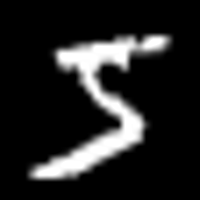


Horizontally flipped view training image:


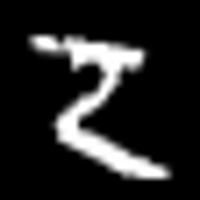


Vertically flipped view training image:


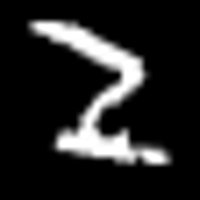


Vertically flipped view of horizontally flipped training image:


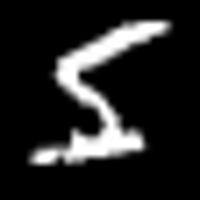


Horizontally flipped view of vertically flipped training image:


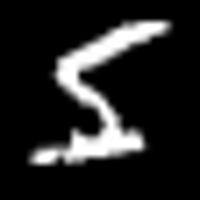

In [31]:
# Horizontal and Vertical Flip code
train_image, train_label = train_set[0]

hor_flip = transforms.RandomHorizontalFlip(p=1.0)
ver_flip = transforms.RandomVerticalFlip(p=1.0)

print("Original view training image:")
display(train_image.resize((200,200)))

print("\nHorizontally flipped view training image:")
display(hor_flip(train_image).resize((200,200)))

print("\nVertically flipped view training image:")
display(ver_flip(train_image).resize((200,200)))

print("\nVertically flipped view of horizontally flipped training image:")
display(ver_flip(hor_flip(train_image)).resize((200,200)))

print("\nHorizontally flipped view of vertically flipped training image:")
display(hor_flip(ver_flip(train_image)).resize((200,200)))

Or maybe it does not matter what color the object is but it is of importance that your model recognizes the edges of an object. In this case you want to make the edges more clear and to do so you first want to turn the colored image into grayscale. 

Original Color Image:


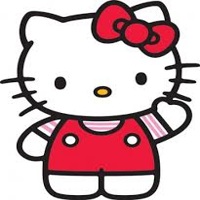


Grayscale Image:


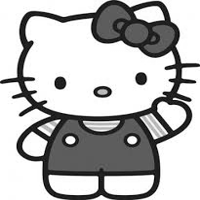

In [32]:
# Grayscale Code
color_image = Image.open("hello_kitty.jpg")

img2gray = transforms.RandomGrayscale(p=1.0)

print("Original Color Image:")
display(color_image.resize((200,200)))
print("\nGrayscale Image:")
display(img2gray(color_image).resize((200,200)))

While we hope this short section on transformations helped you understand what transformations are, what they are used for and how you can apply them. It is a whole topic on its own and there are many other transformations which we did not mention. For this course you will mainly need to know how to transform your data into tensors, the focus will not be on improving results by experimenting with different preprocessing techniques.

### Download, Load and Transform All Together

Now that we have explained what transformations are we would like to show you how you can download, load and transform all at the same time.

In [33]:
train_set = torchvision.datasets.MNIST(root='./data', transform=transforms.Compose([transforms.ToTensor()]), download=True, train=True)
test_set = torchvision.datasets.MNIST(root='./data', transform=transforms.Compose([transforms.ToTensor()]), download=True, train=False)

### Create your own Custom Dataset

You can also use Pytorch's Dataset class to [create your own custom dataset](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files). A custom Dataset class must implement three functions: `__init__`,`__len__` and `__getitem__`.  

What a class is and how to build one is explained in a previous tutorial. Please take a look at that tutorial if this part is not clear to you. 

The `__init__` function is run once when instantiating the Dataset object. Here you can set class variables that can be used throughout the class. The `__len__` function returns the total number of samples found in your custom dataset. finally, `__getitem__` function loads and returns a sample from the dataset at the given index `idx`. So when you use `custom_dataset[1]`, this function is used to load and return the sample at index 1. 

In the code snippet below we will create a custom dataset class based on the MNIST dataset. The only difference is that when we load a data sample we will flip it horizontally. Just to show you how to create a custom dataset. You can ofcourse create a totally different dataset using images locally stored. Or you use this custom dataset class to perform different operations on the images when you load them with `__getitem__`. This is all up to you. 

In [34]:
class CustomMNISTDataset(Dataset):

    def __init__(self, original_mnist_dataset):
        self.original_set = original_mnist_dataset

    def __len__(self):
        return len(self.original_set)

    def __getitem__(self, idx):
        img, label = self.original_set[idx]
        horizontal_transform = transforms.RandomHorizontalFlip(p=1.0)
        return horizontal_transform(img), label

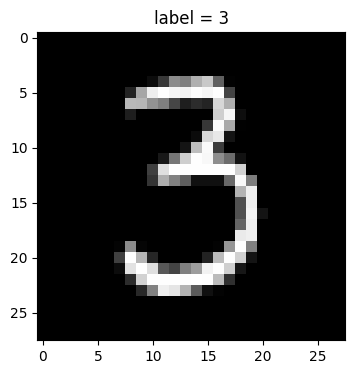

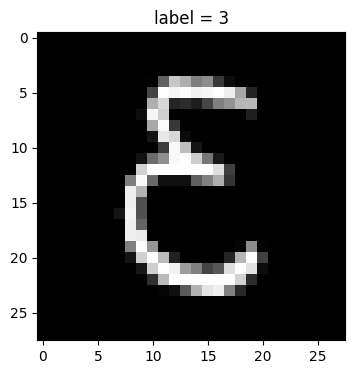

In [35]:
custom_set = CustomMNISTDataset(train_set)

train_image, train_label = train_set[50]
custom_image, custom_label = custom_set[50]

plot_image(train_image,train_label)
plot_image(custom_image,custom_label)

## PyTorch DataLoaders (MNIST Dataset)

In the first part of this tutorial you have learned how to load and transform the MNIST dataset. Now, you can use this data to train a machine learning model in several ways. Either you train the model once on the entire dataset. Or you leave a part aside to validate your model inbetween training. You can also train your model in multiple runs. This can be done sequentially each run, where you feed the training samples in the same order or you shuffle them each round. Moreover, you can also divide your training set in smaller groups, otherwise known as batches, to reduce the memory needed as you do not load the training data all at once. This has the additional benefit that you can process data in parallel for faster data loading. Either way, you have multiple options on how to feed the data to your model. 

PyTorch [DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) class is an utility class that provides you the tools to load data from a Dataset and create mini-batches for training your models. It is designed to handle large datasets and enables you to perform [data augmentation, shuffling, and other preprocessing tasks](https://saturncloud.io/blog/pytorch-dataloader-features-benefits-and-how-to-use-it/). Instead of having to implement your data training strategy yourself, you can simply use this class to make your life easier. The following code snippet shows how to wrap a DataLoader around the MNIST dataset.

In [36]:
# DataLoaders code
train_set = torchvision.datasets.MNIST(root='./data', transform=transforms.Compose([transforms.ToTensor()]), download=True, train=True)
test_set = torchvision.datasets.MNIST(root='./data', transform=transforms.Compose([transforms.ToTensor()]), download=True, train=False)

train_dataloader = DataLoader(train_set, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=64, shuffle=True)

As you can see from this code snippet and from the pytorch documentation, the `DataLoader` class takes a few parameters. The most important for now are:
- dataset (Dataset): dataset from which to load the data.
- batch_size (int, optional): how many samples per batch to load (default: 1).
- shuffle (bool, optional): set to `True` to have the data reshuffled at every epoch (default: `False`).
- sampler (Sampler or Iterable, optional): defines the strategy to draw samples from the dataset. Can be any `Iterable` with `__len__` implemented. If specified, `shuffle` must not be specified. (default: None).
- batch_sampler (Sampler or Iterable, optional): like `sampler`, but returns a batch of indices at a time. Mutually exclusive with `batch_size`, `shuffle`, `sampler` and `drop_last`. (default: None).
- num_workers (int, optional): how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process. (default: 0).
- pin_memory (bool, optional): If `True`, the data loader will copy Tensors into device/CUDA pinned memory before returning them. (default: `False`).

The other parameters can be found [here](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

Below we show you how to iterate over the dataloader and get images with corresponding labels.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


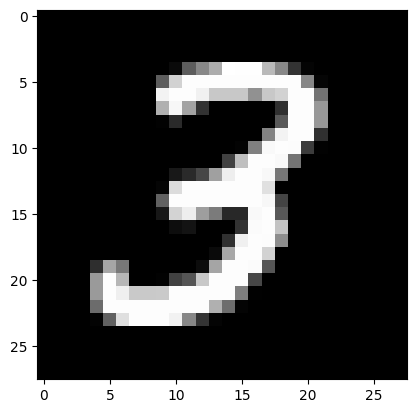

Label: 3


In [37]:
# Iterate through dataloader
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

Now you know everything there is to know for this course on loading data and using the dataloader to efficiently feed data to your machine learning model. In a next tutorial we will focus on building machine learning models and we will then use the dataloader to actually start training models.

Before you start on the next tutorial you can test your knowledge on Datasets and Dataloaders with the exercises below. This time you will be asked to load the data from the CIFAR-10 dataset yourself.

## Exercises (CIFAR-10 Dataset)

We showed you how to load the MNIST dataset and now you are going to try to do the same but load the CIFAR10 dataset. In some cases you will need to finish the code we already added and in other cases you might need to add some more yourself. 

### Load CIFAR-10 dataset

Finish the code below in such a way you do not get an assertion error or any other error.

In [ ]:
train_set = torchvision.datasets.CIFAR10(root='./data', download=True, train=True)

In [ ]:
test_set = torchvision.datasets.CIFAR10(root='./data', download=True, train=False)

In [ ]:
train_set = ...
assert type(train_set) ==  datasets.CIFAR10
assert len(train_set) == 50000

In [ ]:
test_set = ...
assert type(test_set) == datasets.CIFAR10
assert len(test_set) == 10000

Lets visualize the data by executing the code snippet below. This snippet should run without errors if you loaded the data correctly.

In [ ]:
train_image, train_label = train_set[1]
print("Label = ", train_label)
display(train_image.resize((200,200)))

As you can probably see we are dealing with colored PIL images and Integer labels. CIFAR10 contains [10 different category images](https://www.cs.toronto.edu/~kriz/cifar.html). The 10 categories/classes are in order of label number:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

In [ ]:
classes = ['airplaine', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
print("Label = ", classes[train_label])
display(train_image.resize((200,200)))

Execute the code snippet below to examine the shape of the training data.

In [ ]:
train_images = train_set.data
train_images.shape

As you can see there are 50.000 images of shape 32x32x3. So not only are they a different size then the MNIST images, which were of size 28x28. Also they include 3 channels instead of only 1. As these are colored images, we are dealing with RGB color channels. Keep this in mind when working with this dataset.

### Transform CIFAR-10 dataset

In [ ]:
train_image, train_label = train_set[1]

transform = ...

transformed_image = ...

plot_image(transformed_image,classes[train_label],colored=True)

In [ ]:
train_image, train_label = train_set[1]

transform = transforms.Compose([
    transforms.PILToTensor(),
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.RandomVerticalFlip(p=1.0)
])

transformed_image = transform(train_image)

plot_image(transformed_image,classes[train_label],colored=True)

### Create Custom Dataset

Now create a custom CIFAR10 dataset that when, `__getitem__` is called, returns grayscale vertically flipped tensors.

In [ ]:
class __(Dataset):

    def ...():

    def ...():

    def ...():

Finish the code snippet below. The image displayed should be gray and vertically flipped.

In [ ]:
custom_train = ...

img, label = custom_train[1]
plot_image(img,label)

### Use DataLoaders on the CIFAR-10 dataset

Finally, you are going to wrap the loaded CIFAR10 dataset into a DataLoader. Create DataLoader of your custom dataset with batch size of 128 and shuffle set to True. Then load one batch and display the data of one batch like done above.

In [ ]:
train_dataloader = DataLoader(..., ..., ...)

train_features, train_labels = ...

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plot_image(img,classes[label.item()])